### 1.Problem 
We have to predict the sale price of the house based on the given features

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.ensemble import RandomForestRegressor

In [60]:
from sklearn.feature_selection import VarianceThreshold

In [71]:
from sklearn.metrics import mean_squared_error

In [90]:
from sklearn.linear_model import LinearRegression

In [107]:
from sklearn.model_selection import GridSearchCV

In [154]:
import numpy as np

### 2.Loading the data

In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [6]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [8]:
print('Train_shape:',train.shape)
print('Test_shape',test.shape)

Train_shape: (1460, 81)
Test_shape (1459, 80)


In [9]:
train_Id = train.Id
test_Id = test.Id

In [10]:
train = train.drop(columns = 'Id')
test = test.drop(columns = 'Id')

### 3.1 Descriptive Statitics

In [11]:
train.describe(include = 'all')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,5,NaN,NaN,2,2,4,4,2,5,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [12]:
skewness = train.skew()

In [13]:
skewness[abs(skewness)<1]

OverallQual     0.216944
OverallCond     0.693067
YearBuilt      -0.613461
YearRemodAdd   -0.503562
BsmtUnfSF       0.920268
2ndFlrSF        0.813030
BsmtFullBath    0.596067
FullBath        0.036562
HalfBath        0.675897
BedroomAbvGr    0.211790
TotRmsAbvGrd    0.676341
Fireplaces      0.649565
GarageYrBlt    -0.649415
GarageCars     -0.342549
GarageArea      0.179981
MoSold          0.212053
YrSold          0.096269
dtype: float64

### the above are the columns with slght deviation from normal distribution

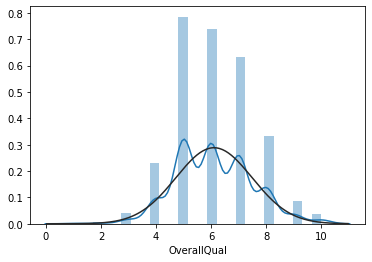

In [14]:
sns.distplot(train.OverallQual,fit = stats.norm)
plt.show()

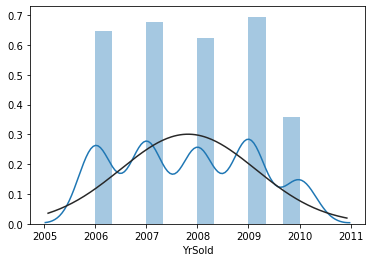

In [15]:
sns.distplot(train.YrSold,fit = stats.norm)

In [16]:
skewness[abs(skewness)>1]

MSSubClass        1.407657
LotFrontage       2.163569
LotArea          12.207688
MasVnrArea        2.669084
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
TotalBsmtSF       1.524255
1stFlrSF          1.376757
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtHalfBath      4.103403
KitchenAbvGr      4.488397
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
SalePrice         1.882876
dtype: float64

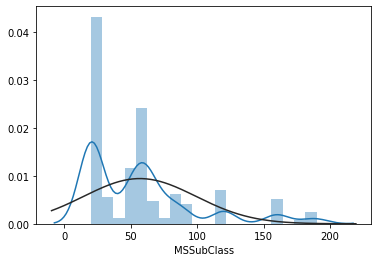

In [17]:
sns.distplot(train.MSSubClass,fit = stats.norm)

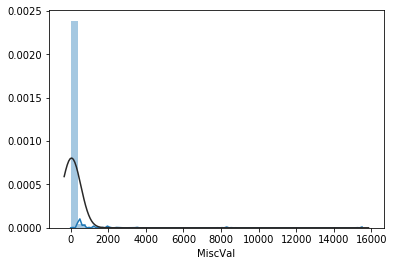

In [18]:
sns.distplot(train.MiscVal,fit=stats.norm)
plt.show()

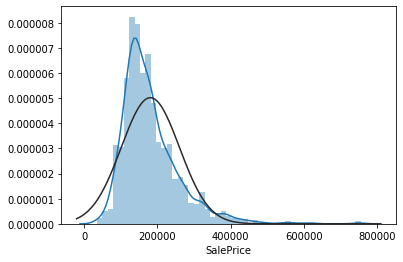

In [19]:
sns.distplot(train.SalePrice,fit = stats.norm)

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [21]:
missing_value_series = pd.Series(train.isna().sum()).sort_values(ascending = False)

In [22]:
missing_value_series = missing_value_series[missing_value_series>0]
missing_value_series

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageCond        81
GarageFinish      81
GarageQual        81
GarageYrBlt       81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

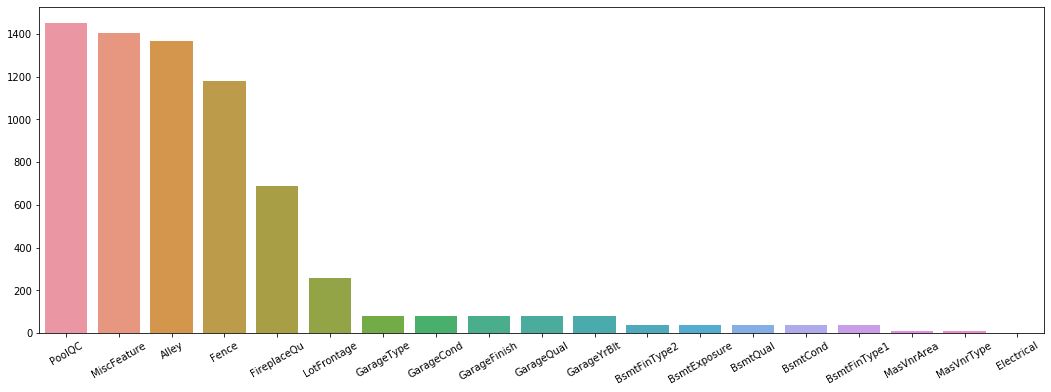

In [23]:
# the graph represents missi
plt.figure(figsize=(18,6))
sns.barplot(missing_value_series.index,missing_value_series)
plt.xticks(rotation = 30)
plt.show()

PollQC has 1453 missing values ,it is the pool Quality and NA means no pool(most of the houses have no pool) we can replace it with None 

MiscFeature has 1406 missing values,MiscFeature with NA means no other extra facilities like Lift,second Garage etc, we can replace null values with None

Alley has 1369 missing values           
Alley as per the description is the access to Alley, NA indicates No access to Alley we can replace na with None  

Fence has 1179 missing values.In Fence NA means no fence is present in the house,replace that with None          

FirePlaceQu has 690 missing values,FirePlaceQu means fire place quality, NA indicates no Fireplace, replace NA with None

LotFrontage has 259 missing values.LotFrontage is the Linear feet of street connected to property, we can replace the null values by mean

GarageCond     has   81  missing values              
GarageType     has   81  missing values              
GarageYrBlt    has   81  missing values              
GarageFinish   has   81  missing values              
GarageQual     has   81  missing values              
In all these columns NA means no Garage is available,we can replace them with None                

BsmtExposure      38  missing values              
BsmtFinType2      38  missing values              
BsmtFinType1      37  missing values              
BsmtCond          37  missing values              
BsmtQual          37  missing values              

In all these columns NA means no Basement is available,we can replace them with None                

MasVnrType         8  missing values              

In all these columns NA means no Masonry veneer type is available,we can replace them with None

MasVnrArea         8  missing values              
with Masonry veneer type not avaible,MasVnrArea  is also not available,we can replace them with None

Electrical has 1 missing value,which represents the Electrical System being used, we can replace null values with mode

In [24]:
cat_columns = list(train.select_dtypes(include = 'object').columns)

In [25]:
num_columns = list(train.select_dtypes(exclude = 'object').columns)

In [26]:
for col in cat_columns:
    print('*'*20,'Houses count by ',col, '*'*20)
    print(train[col].value_counts())

******************** Houses count by  MSZoning ********************
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
******************** Houses count by  Street ********************
Pave    1454
Grvl       6
Name: Street, dtype: int64
******************** Houses count by  Alley ********************
Grvl    50
Pave    41
Name: Alley, dtype: int64
******************** Houses count by  LotShape ********************
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
******************** Houses count by  LandContour ********************
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
******************** Houses count by  Utilities ********************
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
******************** Houses count by  LotConfig ********************
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtyp

More number of houses are in sale condition normal, the sale is price is maximun when sale condition is Partial

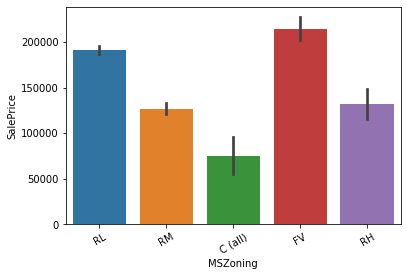

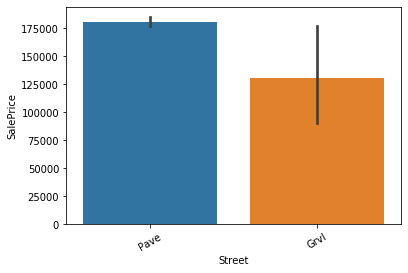

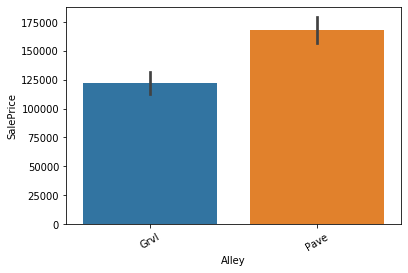

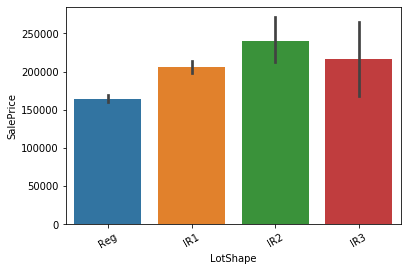

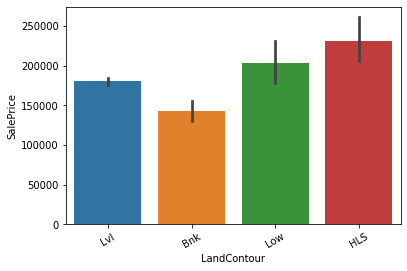

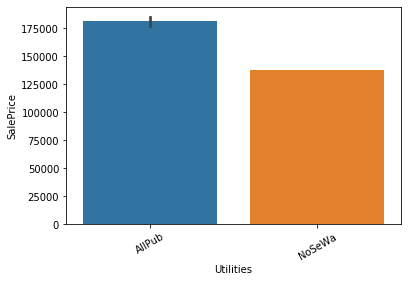

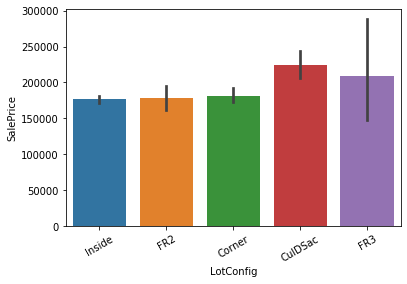

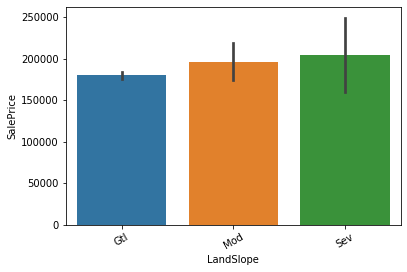

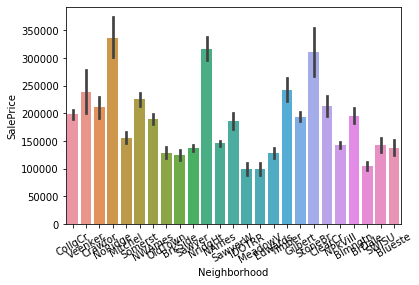

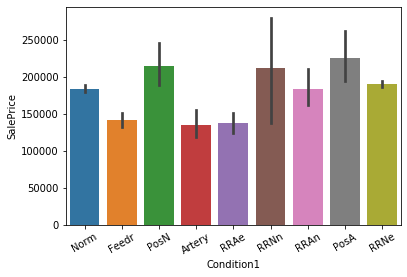

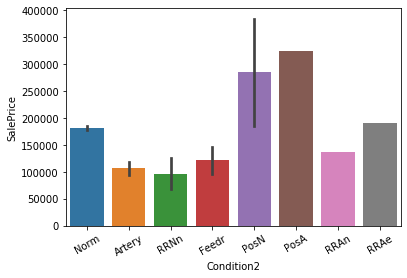

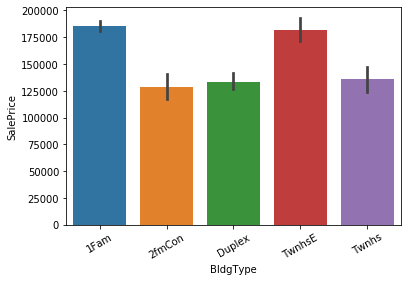

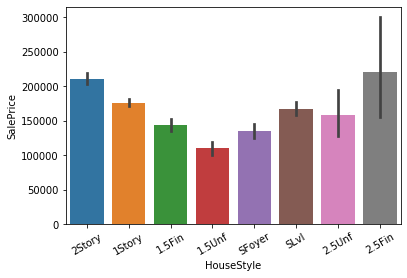

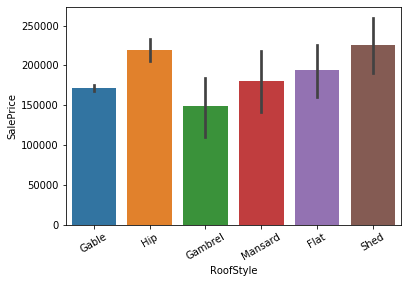

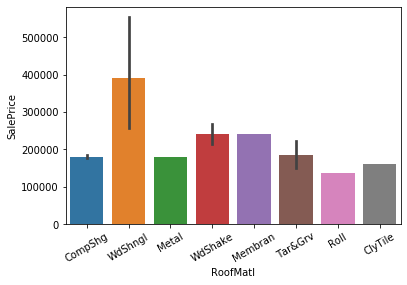

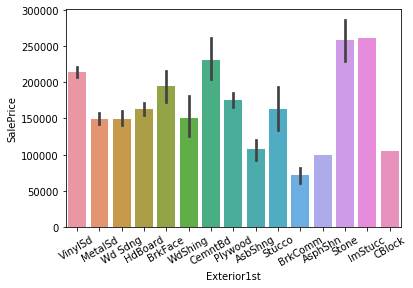

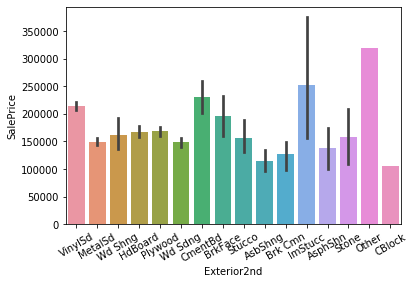

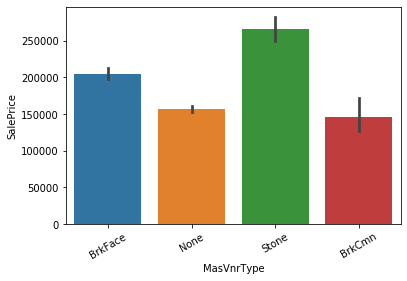

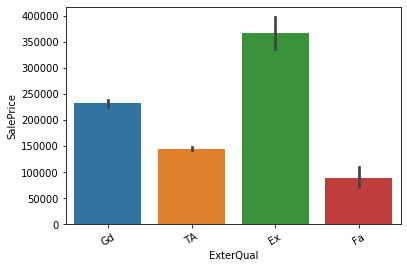

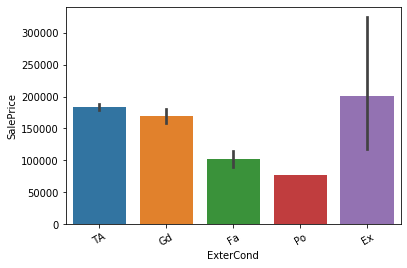

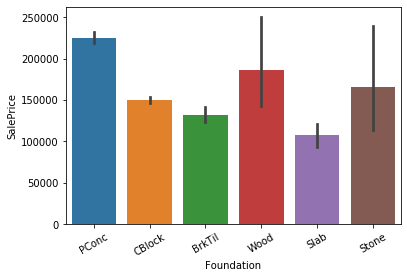

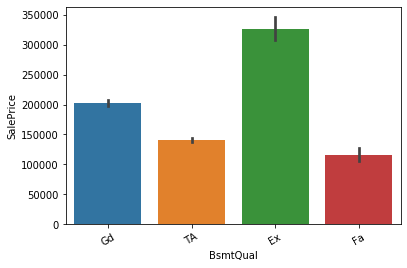

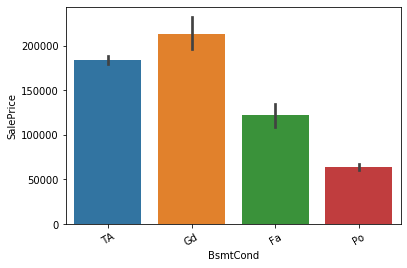

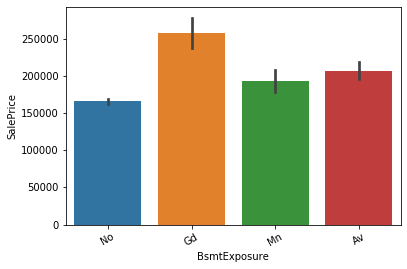

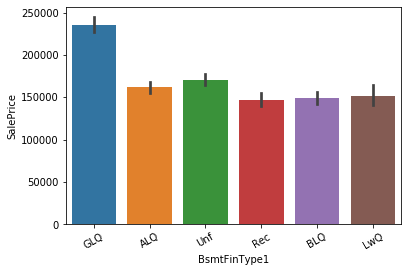

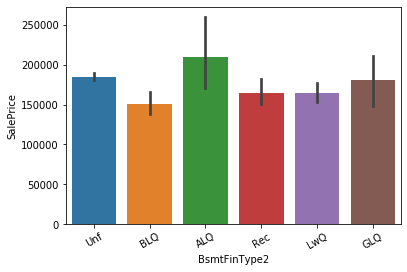

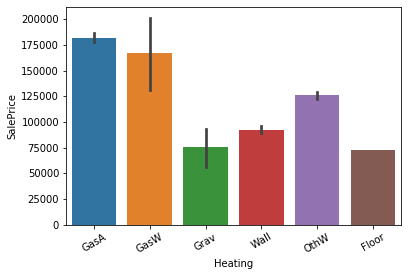

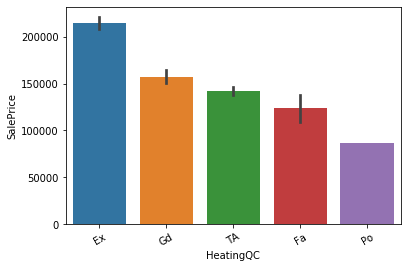

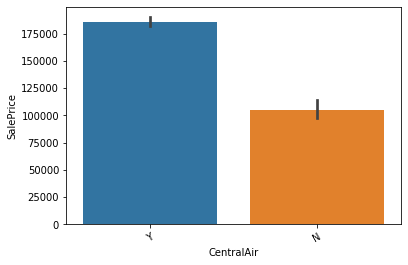

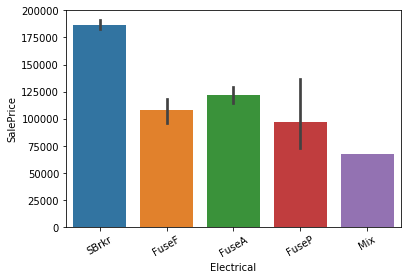

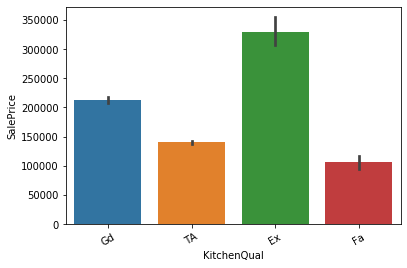

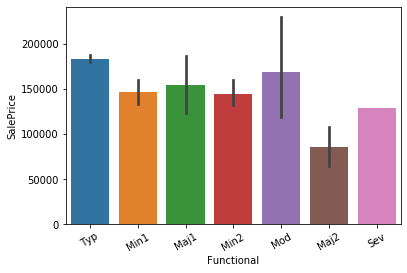

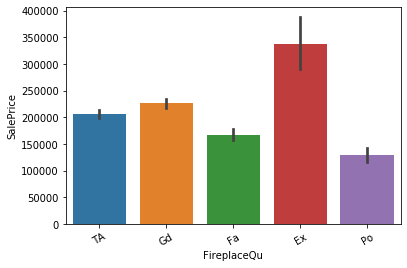

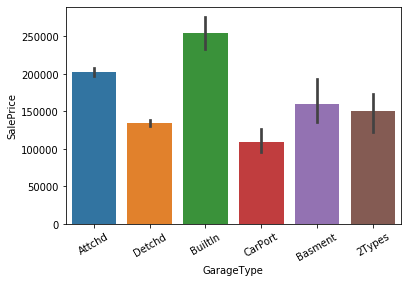

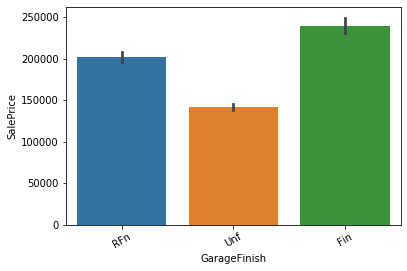

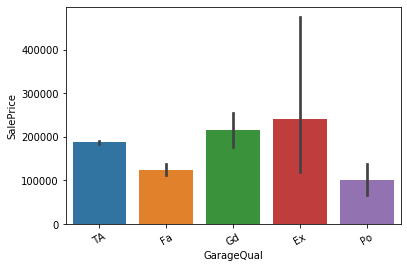

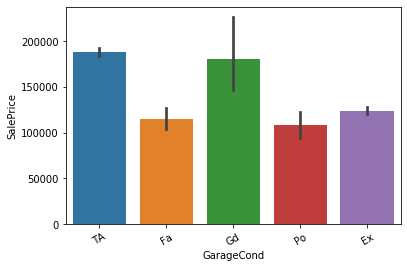

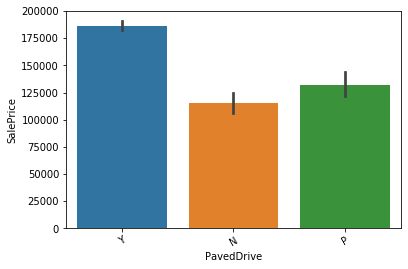

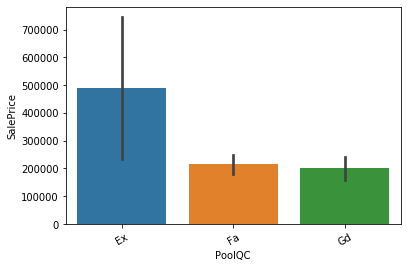

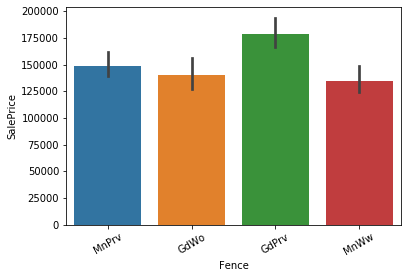

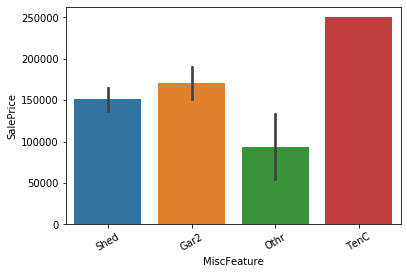

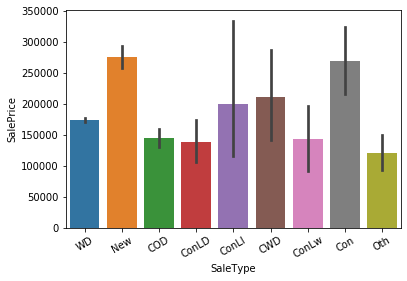

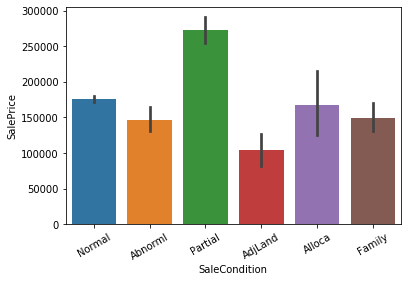

In [27]:
for col in cat_columns:
    sns.barplot(x=col,
            y = 'SalePrice',
            data = train)
    plt.xticks(rotation = '30')
    plt.show()

As all the categorical columns have impact over the sale price,all the categorical columns are important

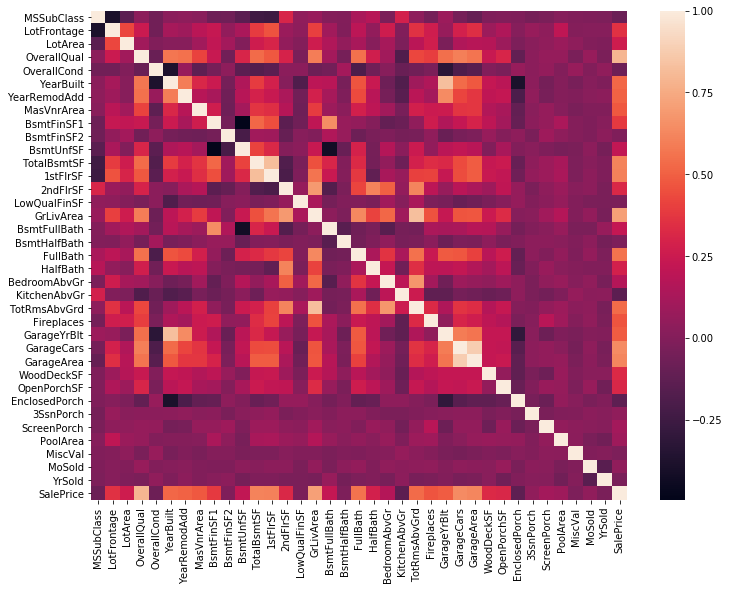

In [28]:
#Correlation map to see how features are correlated with SalePrice
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat)
plt.show()

In [29]:
# checking correation with the SalePrice Column
corr_SalePrice = pd.Series(train.corr().SalePrice,index = num_columns)
corr_SalePrice.sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [30]:
corr_SalePrice[abs(corr_SalePrice)>0.3].sort_values(ascending = False)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
Name: SalePrice, dtype: float64

In [31]:
corr_SalePrice[abs(corr_SalePrice)<0.3].sort_values(ascending = False)

HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

We see that OverallQual is more correlated with SalePrice and follwed by GrLivArea,GarageCars,GarageArea etcc,     
The less correlated features are 3SsnPorch,MoSold,MoSold  

### treating missing Values

In [32]:
# columns with missing values in train data
missing_value_series.index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageType', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageYrBlt',
       'BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1',
       'MasVnrArea', 'MasVnrType', 'Electrical'],
      dtype='object')

In [33]:
# columns with missing values in test data
test_missing_value_series = pd.Series(test.isna().sum(),list(test.columns)).sort_values(ascending = False)
test_missing_value_series[test_missing_value_series>0].index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageCond', 'GarageFinish', 'GarageYrBlt', 'GarageQual', 'GarageType',
       'BsmtCond', 'BsmtExposure', 'BsmtQual', 'BsmtFinType1', 'BsmtFinType2',
       'MasVnrType', 'MasVnrArea', 'MSZoning', 'BsmtHalfBath', 'Utilities',
       'Functional', 'BsmtFullBath', 'BsmtFinSF2', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', 'Exterior2nd', 'SaleType', 'Exterior1st', 'KitchenQual',
       'GarageArea', 'GarageCars'],
      dtype='object')

In [34]:
# In PoolQC NA means no pool,we can replace it by none
train['PoolQC'] = train['PoolQC'].fillna('None')
test['PoolQC'] = test['PoolQC'].fillna('None')

In [35]:
# NA in MiscFeature means no misc feature
test['MiscFeature'] = test['MiscFeature'].fillna('None')
train['MiscFeature'] = train['MiscFeature'].fillna('None')

In [36]:
# Alley means no Alley access
test['Alley'] = test['Alley'].fillna('None')
train['Alley'] = train['Alley'].fillna('None')

In [37]:
# NA in Fence means no Fence
test['Fence'] = test['Fence'].fillna('None')
train['Fence'] = train['Fence'].fillna('None')

In [38]:
# NA in FireplaceQu means no Fireplace
test['FireplaceQu'] = test['FireplaceQu'].fillna('None')
train['FireplaceQu'] = train['FireplaceQu'].fillna('None')

In [39]:
# we can fill NA in LotFrontage with the median , Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood
train['LotFrontage'] = train.groupby('Neighborhood')['LotFrontage'].transform(lambda x:x.fillna(x.median()))
test['LotFrontage'] = test.groupby('Neighborhood')['LotFrontage'].transform(lambda x:x.fillna(x.median()))


In [40]:
# GarageType, GarageFinish, GarageQual and GarageCond  Replace missing data with None
for col in ['GarageType', 'GarageCond', 'GarageFinish', 'GarageQual']:
    train[col] = train[col].fillna('None')
    test[col] = test[col].fillna('None')

In [41]:
# Reaplcing GarageYrBlt with 0
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(0)
test['GarageYrBlt'] = test['GarageYrBlt'].fillna(0)

In [42]:
# replacing 'BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1' with None
for col in ['BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1']:
    train[col] = train[col].fillna('None')
    test[col] = test[col].fillna('None')

In [43]:
# NA in 'MasVnrArea', 'MasVnrType' no masonry veneer for the houses,replacing with 0 for area and None for Type
train['MasVnrArea'] = train['MasVnrArea'].fillna(0)
test['MasVnrArea'] = test['MasVnrArea'].fillna(0)
test['MasVnrType'] = test['MasVnrType'].fillna('None')
train['MasVnrType'] = train['MasVnrType'].fillna('None')

In [44]:
# has Electrical has only one NA value replacing it with mode
train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode()[0])
test['Electrical'] = test['Electrical'].fillna(train['Electrical'].mode()[0])

In [45]:
# MSZoning is the General Zoning Classification replacing it with mode
test['MSZoning'] = test['MSZoning'].fillna(train['MSZoning'].mode()[0])

In [46]:
# NA in Functional means Typical 
test['Functional'] = test['Functional'].fillna('Typ')

In [47]:
# Utilities has all records as 'AllPub' expect one , we can it as it is no use for prediction
train = train.drop(['Utilities'],axis =1)
test = test.drop(['Utilities'],axis =1)


In [48]:
cat_columns.remove('Utilities')

In [49]:
# missing values in 'BsmtFullBath','BsmtHalfBath','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','BsmtUnfSF' means no basement
for col in ['BsmtFullBath','BsmtHalfBath','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','BsmtUnfSF']:
    test[col] = test[col].fillna(0)

In [50]:
# 'KitchenQual' has only one NA value, we replce it with mode
test['KitchenQual']  = test['KitchenQual'].fillna(train['KitchenQual'].mode()[0])

In [51]:
# both 'Exterior1st', 'Exterior2nd' have one NA, replacing them with mode
test['Exterior1st']  = test['Exterior1st'].fillna(train['Exterior1st'].mode()[0])
test['Exterior2nd']  = test['Exterior2nd'].fillna(train['Exterior2nd'].mode()[0])

In [52]:
# 'GarageCars','GarageArea' repalcing with 0 because no cars 
test['GarageCars'] = test['GarageCars'].fillna(0)
test['GarageArea'] = test['GarageArea'].fillna(0)

In [53]:
# SaleType fiiling it with mode
test['SaleType']  = test['SaleType'].fillna(train['SaleType'].mode()[0])

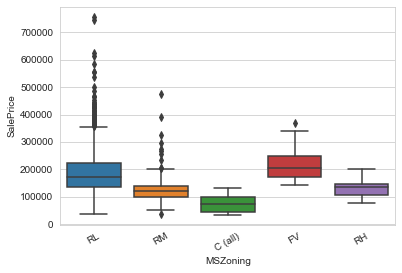

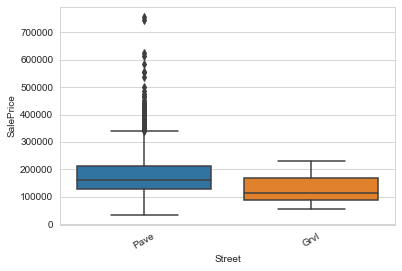

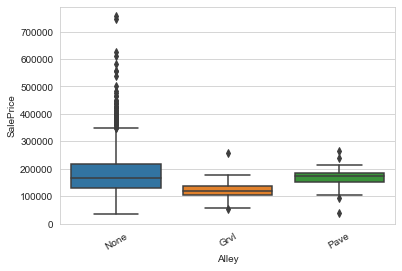

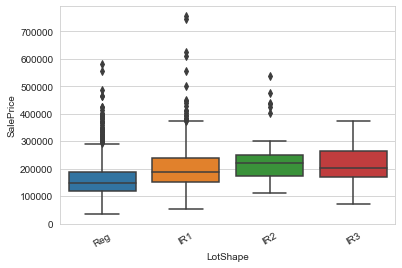

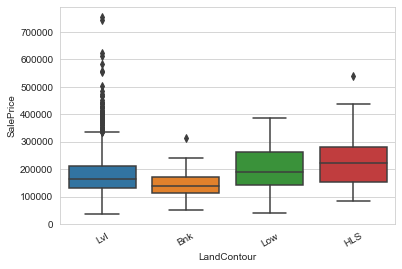

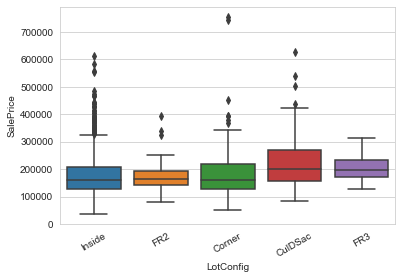

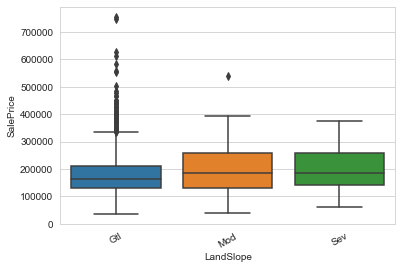

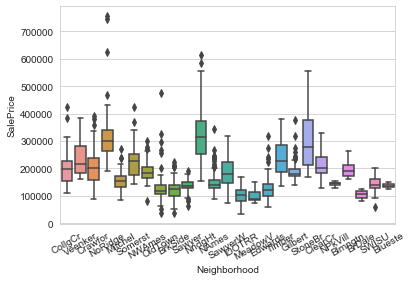

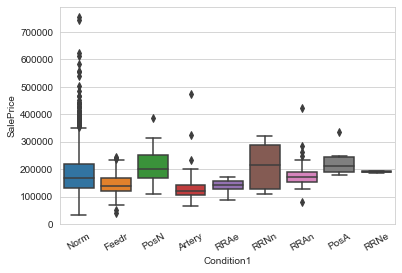

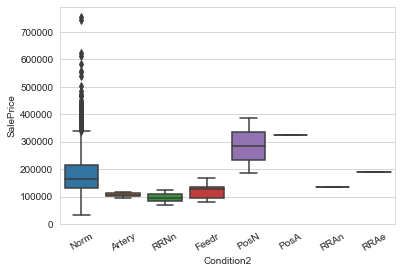

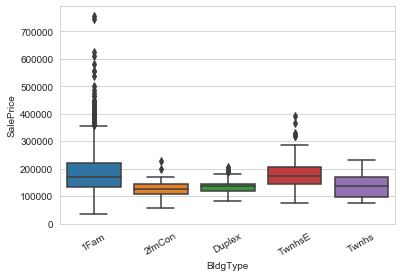

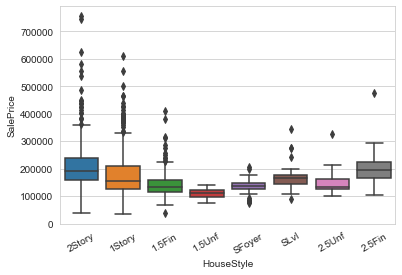

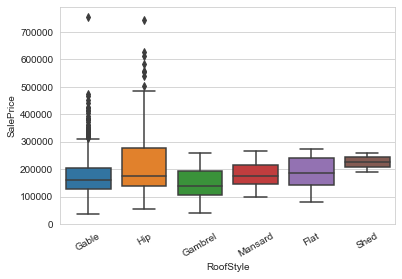

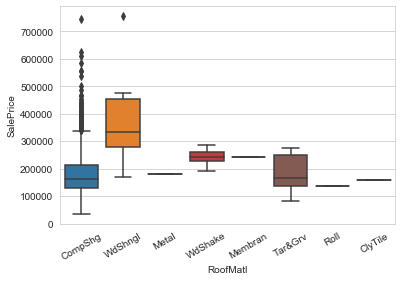

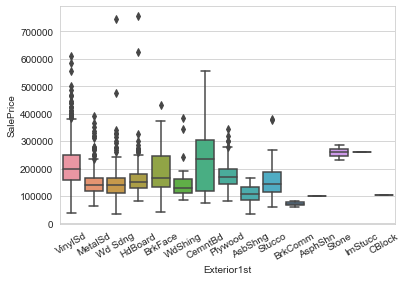

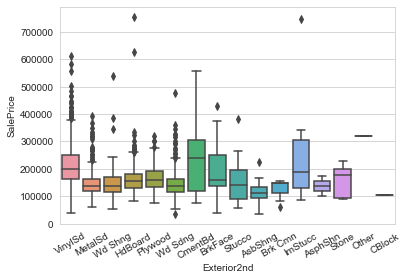

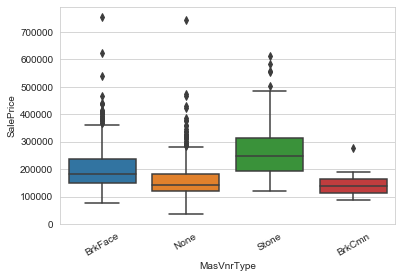

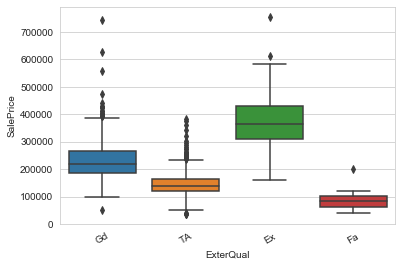

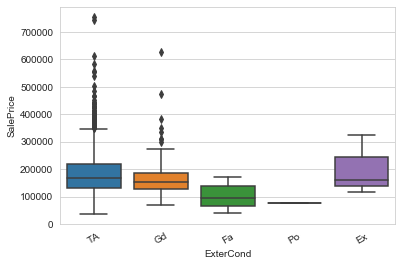

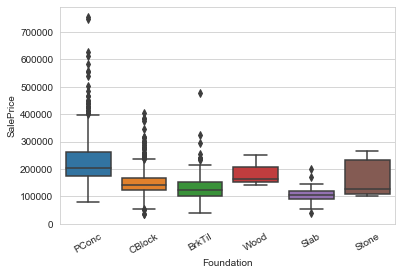

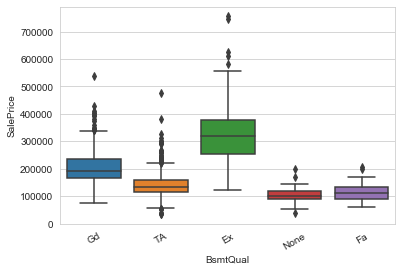

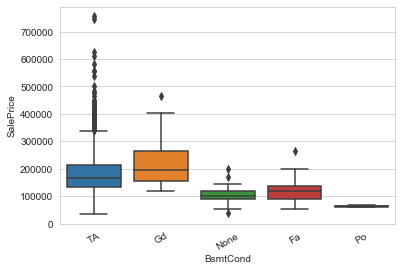

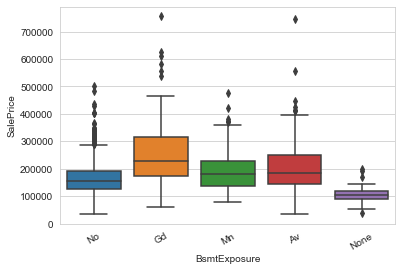

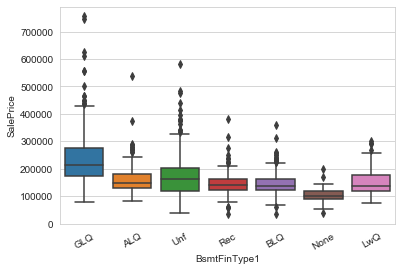

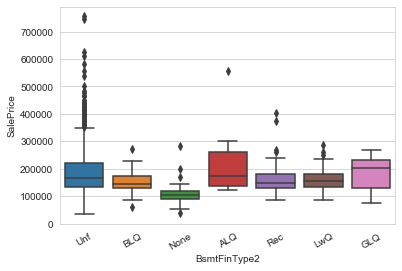

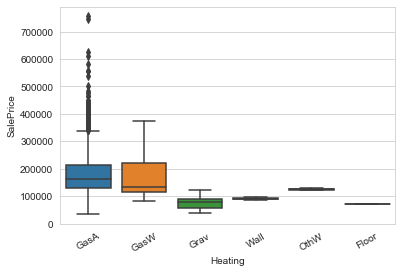

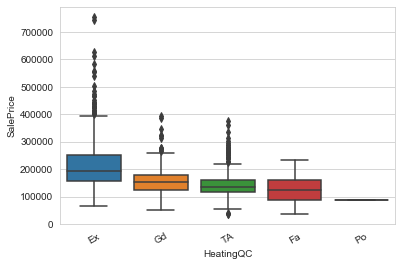

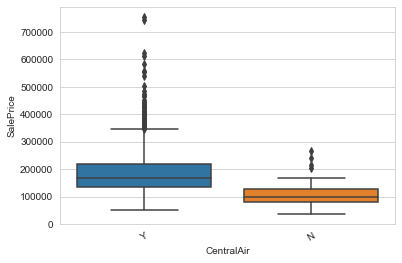

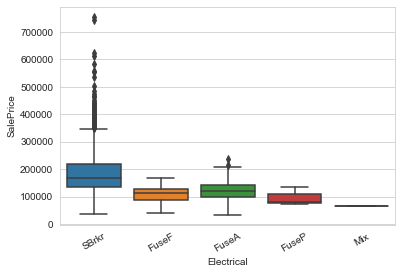

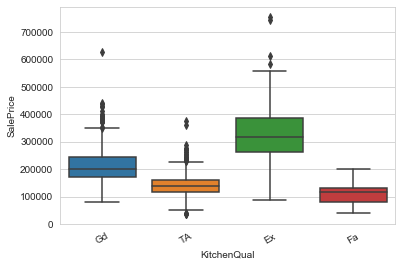

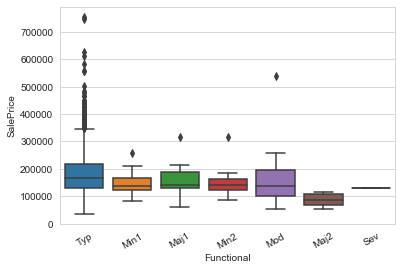

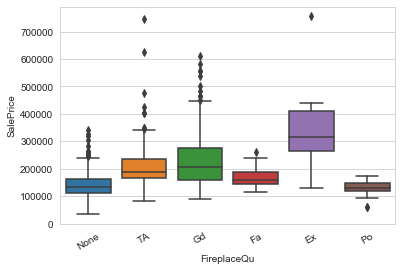

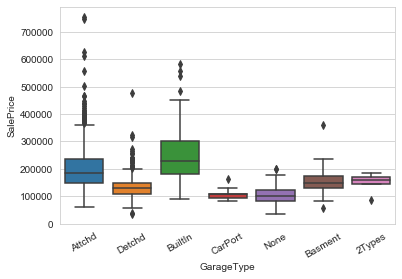

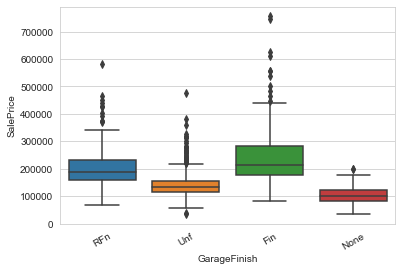

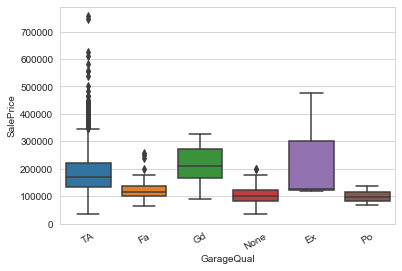

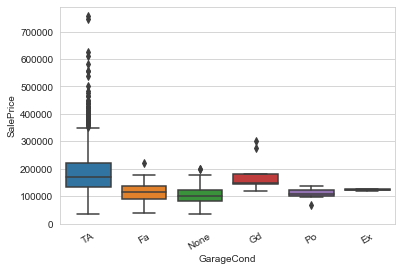

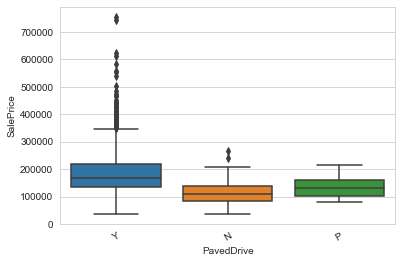

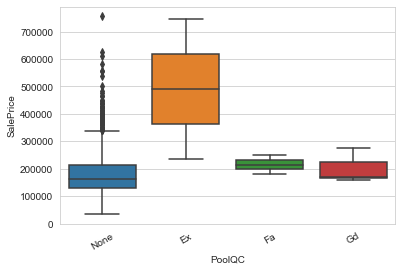

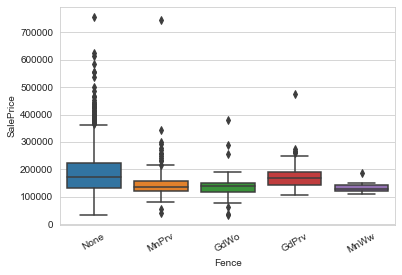

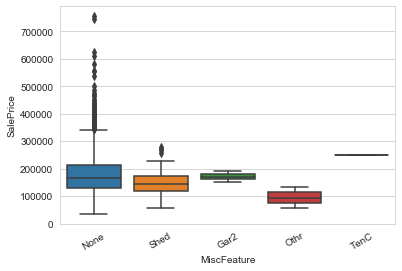

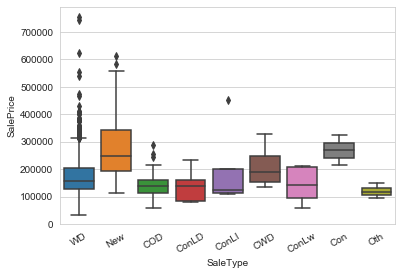

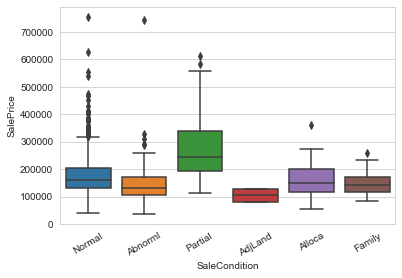

In [54]:
sns.set_style('whitegrid')
for col in cat_columns:
    sns.boxplot(x=col,y='SalePrice',data = train)
    plt.xticks(rotation = 30)
    plt.show()

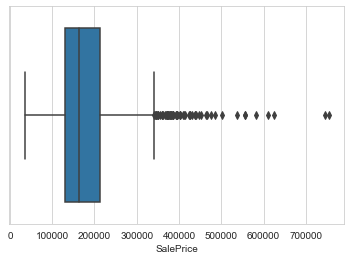

In [55]:
sns.boxplot(train.SalePrice)
plt.show()

 from the abve boxplots it is clear that there are ouliers in the data, lets remove the data where the SalePrice is more that 400000

by removing rows with SalePrice greater than 400000 we remove 28 rows out of 1460 

In [56]:
train = train[train.SalePrice<400000]

In [57]:
# Encoding categorical columns in the train data
for col in cat_columns:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col])
    

In [59]:
# Encoding categorical columns in the train data
for col in cat_columns:
    le = LabelEncoder()
    test[col] = le.fit_transform(test[col])
    

In [61]:
features = train.drop(columns = 'SalePrice')
target = train.SalePrice

In [65]:
features.shape

(1432, 78)

In [62]:
# Feature selection using variance threshold
vt = VarianceThreshold(threshold = 0.2)
filtered_features = vt.fit_transform(features)

In [66]:
len(features.columns[vt.variances_>0.2])

68

#### it means that there are 10 columns with variances less than 0.2 which are removed in train data

In [68]:
features = pd.DataFrame(filtered_features,columns = list(features.columns[vt.variances_>0.2]))

In [69]:
# removing the low variance columns in test data
test = test[list(features.columns)]

#### while comparing regression models we use MSE as a parameter

In [72]:
model = []
mse = []

In [73]:
trainX,testX,trainY,testY = train_test_split(features,target)

### RANSACRegressor

In [142]:
rr = RANSACRegressor()
rr.fit(trainX,trainY)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
                loss='absolute_loss', max_skips=inf, max_trials=100,
                min_samples=None, random_state=None, residual_threshold=None,
                stop_n_inliers=inf, stop_probability=0.99, stop_score=inf)

In [143]:
rr.score(trainX,trainY)

0.7377547688586211

In [144]:
rr.score(testX,testY)

0.8127772521271326

In [145]:
pred = rr.predict(testX)

In [146]:
mean_squared_error(testY,pred)

798579784.3036253

In [147]:
model.append('RANSACRegressor')
mse.append(mean_squared_error(testY,pred))

### KNNRegressor

In [84]:
knr = KNeighborsRegressor(n_neighbors=5)
knr.fit(trainX,trainY)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [85]:
knr.score(testX,testY)

0.6771334642672219

In [89]:
# finding the best value of k
for k in range(4,11):
    knr = KNeighborsRegressor(n_neighbors=k)
    knr.fit(trainX,trainY)
    print('Training Accuracy for ',k,' neighbors',knr.score(trainX,trainY))
    print('Testing Accuracy for ',k,' neighbors',knr.score(testX,testY))
    print('**'*20)

Training Accuracy for  4  neighbors 0.8077524103800291
Testing Accuracy for  4  neighbors 0.6516396480674854
****************************************
Training Accuracy for  5  neighbors 0.7871951770141498
Testing Accuracy for  5  neighbors 0.6771334642672219
****************************************
Training Accuracy for  6  neighbors 0.774366341658918
Testing Accuracy for  6  neighbors 0.6808088683109237
****************************************
Training Accuracy for  7  neighbors 0.7602442108747816
Testing Accuracy for  7  neighbors 0.6825886955265406
****************************************
Training Accuracy for  8  neighbors 0.7444216589567205
Testing Accuracy for  8  neighbors 0.6760339670538746
****************************************
Training Accuracy for  9  neighbors 0.7289305078997197
Testing Accuracy for  9  neighbors 0.6710025730491549
****************************************
Training Accuracy for  10  neighbors 0.7172286690604741
Testing Accuracy for  10  neighbors 0.6769230

the value of k is best for k=7 and the differnce is not much

In [91]:
knr = KNeighborsRegressor(n_neighbors=7)
knr.fit(trainX,trainY)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                    weights='uniform')

In [92]:
pred = knr.predict(testX)

In [93]:
mean_squared_error(testY,pred)

1353885967.0731387

In [94]:
model.append('KNeighborsRegressor(k=7)')
mse.append(mean_squared_error(testY,pred))

### Linear Regression

In [96]:
lr = LinearRegression()
lr.fit(trainX,trainY)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [106]:
lr.score(trainX,trainY)

0.8551182957068111

In [97]:
lr.score(testX,testY)

0.834638743104438

In [98]:
pred = lr.predict(testX)

In [99]:
mean_squared_error(testY,pred)

705331795.2234355

In [100]:
model.append('LinearRegression')
mse.append(mean_squared_error(testY,pred))

### RandomForestRegressor

In [102]:
rfr = RandomForestRegressor(n_estimators=1000)

In [103]:
rfr.fit(trainX,trainY)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [104]:
rfr.score(testX,testY)

0.8475869435776948

In [105]:
rfr.score(trainX,trainY)

0.982045227776625

In [114]:
### finding the best parameters for random forest regressor
rfr = RandomForestRegressor()
gs = GridSearchCV(rfr,param_grid = {'n_estimators' :[100,200,500,1000],'max_depth' :[10,20,30,None]},cv =5,n_jobs=3)

In [115]:
gs.fit(trainX,trainY)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=3,
             param_grid={'max_depth': [10, 20, 30, None],
 

In [116]:
gs.best_score_

0.8623875125845271

In [117]:
gs.best_params_

{'max_depth': None, 'n_estimators': 200}

In [118]:
### creating best RandomForest Regressor model
rfr = RandomForestRegressor(n_estimators=200)
rfr.fit(trainX,trainY)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [119]:
rfr.score(trainX,trainY)

0.9817375620905533

In [120]:
rfr.score(testX,testY)

0.8482810251963724

In [121]:
pred = rfr.predict(testX)

In [122]:
mean_squared_error(testY,pred)

647142014.2584435

In [123]:
model.append(' RandomForestRegressor(n_estimators=200)')
mse.append(mean_squared_error(testY,pred))

### model comparision

In [155]:
pd.DataFrame(np.round(mse,2),index = model,columns = ['mean_square_error'])

,mean_square_error
KNeighborsRegressor(k=7),1.353886e+09
LinearRegression,7.053318e+08
RandomForestRegressor(n_estimators=200),6.471420e+08
RANSACRegressor,7.985798e+08


RandomForestRegressor has least mean_square_error, but the model has a tendency to over fit,
the next best model is linear regression

In [164]:
test_pred = lr.predict(test)

In [168]:
result = pd.DataFrame(test_pred,index = test_Id,columns = ['SalePrice'])

In [169]:
result.to_csv('lrmodel.csv')

In [ ]:
p